<h1>1.Analisis Exploratorio

In [36]:
# 1. Importar librerías necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#Cargar los datos
Datos=pd.read_csv('heart_cleveland_upload.csv')

In [5]:
Datos.head(60)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
5,64,1,0,170,227,0,2,155,0,0.6,1,0,2,0
6,63,1,0,145,233,1,2,150,0,2.3,2,0,1,0
7,61,1,0,134,234,0,0,145,0,2.6,1,2,0,1
8,60,0,0,150,240,0,0,171,0,0.9,0,0,0,0
9,59,1,0,178,270,0,2,145,0,4.2,2,0,2,0


In [6]:
print(Datos.info())
print(Datos.describe())
print(Datos.isnull().sum())  # Verificar valores faltantes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB
None
              age         sex          cp    trestbps        chol         fbs  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean    54.542088    0.676768    2.1

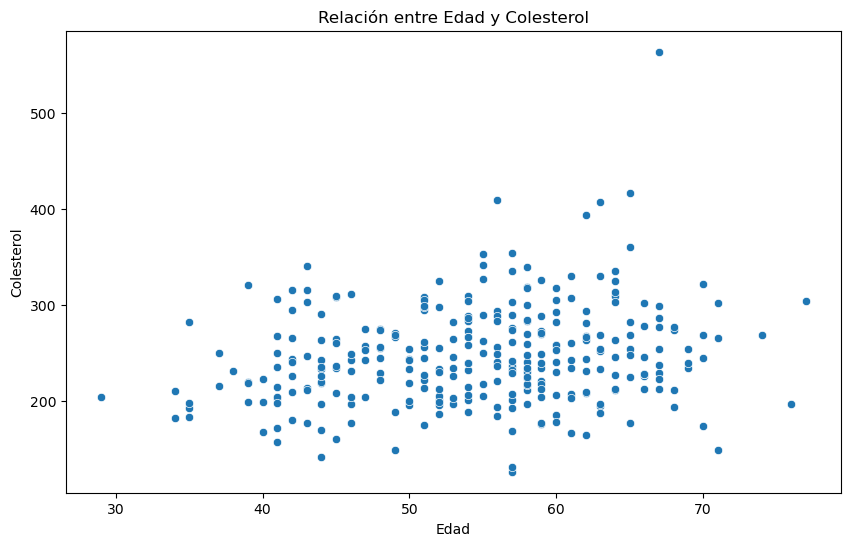

In [7]:
# Visualización específica de la relación entre 'Age' y 'Cholesterol'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=Datos, x='age', y='chol')
plt.title('Relación entre Edad y Colesterol')
plt.xlabel('Edad')
plt.ylabel('Colesterol')
plt.show()

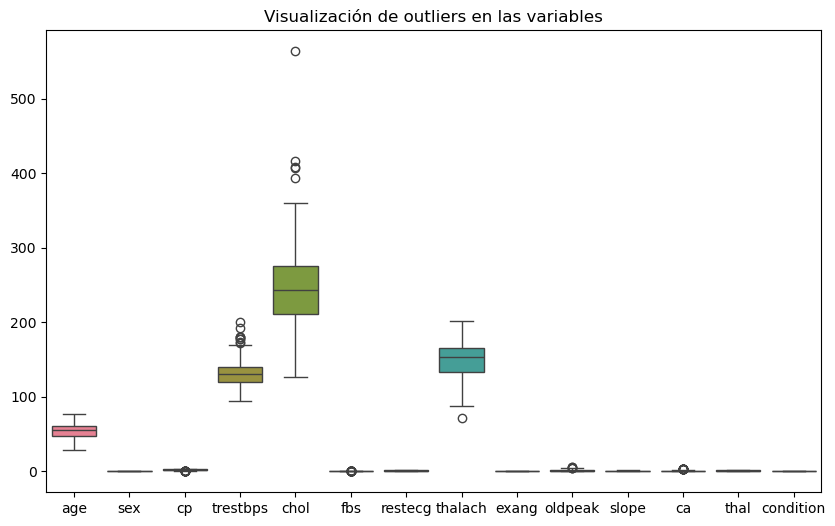

In [3]:
# Boxplot para identificar outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=Datos)
plt.title('Visualización de outliers en las variables')
plt.show()

<h1>2.Preprocesamiento de los datos 

In [14]:
# Imputación de valores faltantes
Datos.loc[:, 'age'] = Datos['age'].fillna(Datos['age'].median())  # Ejemplo de imputación para 'age'
Datos.loc[:, 'trestbps'] = Datos['trestbps'].fillna(Datos['trestbps'].median())  # Ejemplo para presión en reposo
Datos.loc[:, 'chol'] = Datos['chol'].fillna(Datos['chol'].median())  # Ejemplo para colesterol
Datos.loc[:, 'thalach'] = Datos['thalach'].fillna(Datos['thalach'].median())  # Frecuencia cardíaca máxima

# Imputación para columna categórica usando la moda
Datos.loc[:, 'thal'] = Datos['thal'].fillna(Datos['thal'].mode()[0])  # Ejemplo para la columna 'thal'

# Confirmar que los valores faltantes se han corregido
print(Datos.isnull().sum())

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64


In [4]:
# Estandarización de características numéricas
scaler = StandardScaler()
cols_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
Datos[cols_to_scale] = scaler.fit_transform(Datos[cols_to_scale])

# Verificar el resultado de la estandarización
print(Datos[cols_to_scale].head())

        age  trestbps      chol   thalach   oldpeak
0  1.600302  1.596266 -0.257179 -0.812095 -0.820813
1  1.600302  0.468418 -0.160859  0.061157  0.639470
2  1.268242  1.032342 -0.411292 -1.554358  1.326662
3  1.157555  0.355633  0.667499  1.065396  0.295874
4  1.046868 -1.223355 -0.700254 -0.244481  0.639470


<h1>3.Seleccion de caracteristicas

In [15]:
# Verificar todas las columnas disponibles en el dataset
print(Datos.columns)
features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
X = Datos[features]
y = Datos['condition']  # Variable objetivo: presencia de enfermedad cardíaca

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'condition'],
      dtype='object')


<h1>4.Division del Dataset

In [17]:
# Dividir el dataset en Train (80%) y Test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0, stratify=y)

# Comprobar las dimensiones de los conjuntos
print(f'Tamaño del conjunto de entrenamiento: {X_train.shape}, {y_train.shape}')
print(f'Tamaño del conjunto de prueba: {X_test.shape}, {y_test.shape}')


Tamaño del conjunto de entrenamiento: (237, 13), (237,)
Tamaño del conjunto de prueba: (60, 13), (60,)


In [20]:
print(X_train)

          age  sex  cp  trestbps      chol  fbs  restecg   thalach  exang  \
91   0.825494    0   2 -0.095506  0.301480    0        0 -2.296622      0   
115 -0.170689    1   2 -0.095506 -0.026010    1        2  1.021734      0   
125 -0.502750    0   2 -0.659431 -0.546141    0        0  0.366795      0   
63  -1.498933    1   1  0.186456 -0.854367    0        0 -0.768432      0   
159  1.489615    1   3  0.693988 -1.047008    1        0 -0.375469      0   
..        ...  ...  ..       ...       ...  ...      ...       ...    ...   
12   0.493433    1   0  0.130063 -0.835103    0        0  0.541445      0   
235  0.161372    1   3 -0.095506  0.686763    1        2 -2.034647      1   
288 -1.388246    1   3  0.242848  1.303215    0        0 -1.074070      1   
216  0.382746    1   3 -0.208291  0.224424    0        2 -0.855757      1   
263 -0.502750    1   3  1.032342 -0.083802    0        2 -0.943082      0   

      oldpeak  slope  ca  thal  
91   0.124076      1   1     2  
115 -0.90

In [21]:
print(y_test)

295    0
215    0
66     0
77     0
53     0
249    0
28     1
188    0
126    1
141    0
224    1
121    0
29     0
167    1
103    1
292    1
10     1
20     0
100    1
294    1
95     0
191    0
267    1
150    0
273    1
272    0
137    0
247    1
1      0
192    1
83     0
270    1
242    1
284    0
73     0
208    1
116    0
217    1
135    0
244    1
68     0
228    1
3      1
202    1
101    0
64     0
274    1
117    0
281    1
131    0
156    0
200    1
140    0
30     0
236    1
264    1
205    1
70     0
287    0
260    1
Name: condition, dtype: int64


<h1>5.Entrenar el modelo

In [22]:
# Entrenamiento del modelo de regresión logística
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

<h1>6.

In [24]:
#Evaluación del modelo
y_pred = model.predict(X_test)
# Métricas de evaluación
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))



[[32  0]
 [ 5 23]]
              precision    recall  f1-score   support

           0       0.86      1.00      0.93        32
           1       1.00      0.82      0.90        28

    accuracy                           0.92        60
   macro avg       0.93      0.91      0.91        60
weighted avg       0.93      0.92      0.92        60



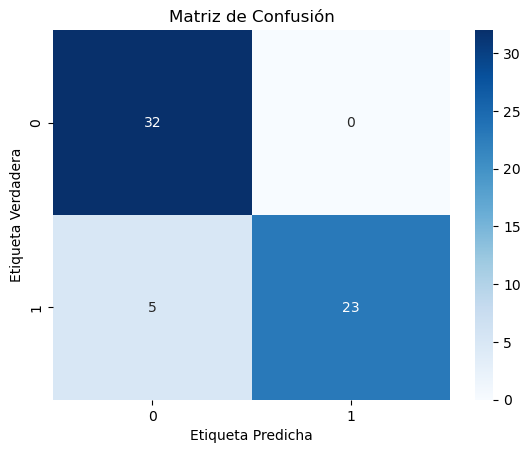

In [25]:
#Gráfico de confusión
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.ylabel('Etiqueta Verdadera')
plt.xlabel('Etiqueta Predicha')
plt.show()

<Figure size 1000x600 with 0 Axes>

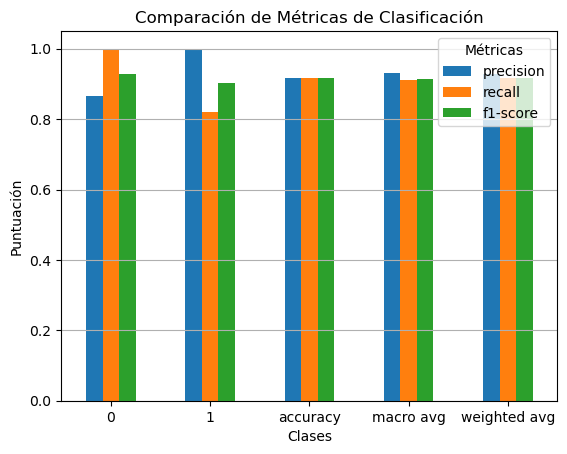

In [28]:
# Reporte de clasificación
report = classification_report(y_test, y_pred, output_dict=True)

# Convertir el reporte a un DataFrame para facilitar la visualización
report_df = pd.DataFrame(report).transpose()

# Gráfico de comparación de métricas
plt.figure(figsize=(10, 6))
report_df[['precision', 'recall', 'f1-score']].plot(kind='bar')
plt.title('Comparación de Métricas de Clasificación')
plt.xlabel('Clases')
plt.ylabel('Puntuación')
plt.xticks(rotation=0)
plt.legend(title='Métricas')
plt.grid(axis='y')
plt.show()

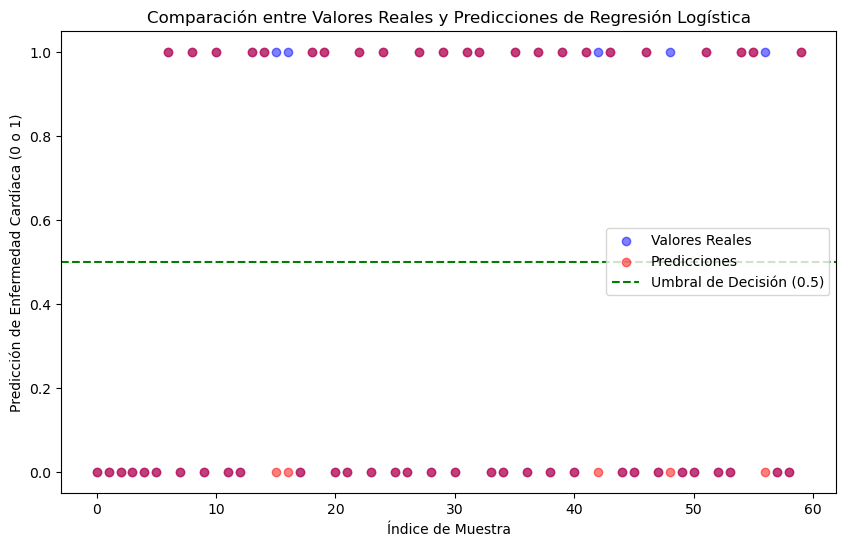

In [35]:
# Visualizar la comparación de predicciones de regresión logística
plt.figure(figsize=(10, 6))

# Graficar valores reales
plt.scatter(range(len(y_test)), y_test, label='Valores Reales', color='blue', alpha=0.5)

# Graficar predicciones
plt.scatter(range(len(y_test)), y_pred, label='Predicciones', color='red', alpha=0.5)

# Graficar la línea de decisión (umbral) en 0.5
plt.axhline(0.5, color='green', linestyle='--', label='Umbral de Decisión (0.5)')

# Etiquetas y título
plt.xlabel('Índice de Muestra')
plt.ylabel('Predicción de Enfermedad Cardíaca (0 o 1)')
plt.title('Comparación entre Valores Reales y Predicciones de Regresión Logística')
plt.legend()

# Mostrar gráfico
plt.show()

<h1>Interpretación y Análisis de Resultados de la Regresión Logística
    
Objetivo del Análisis: El análisis se centra en predecir la presencia de enfermedad cardíaca utilizando características clínicas de los pacientes. La variable objetivo es binaria (0: sin enfermedad cardíaca, 1: con enfermedad cardíaca).

Visualización de Resultados: El gráfico que compara los valores reales y las predicciones permite identificar la precisión del modelo. Los puntos en azul representan los valores reales, mientras que los puntos en rojo muestran las predicciones del modelo. La línea verde indica el umbral de decisión de 0.5, que se utiliza para clasificar las observaciones.

Análisis de la Confusión: La matriz de confusión ayuda a evaluar el desempeño del modelo al mostrar el número de verdaderos positivos, verdaderos negativos, falsos positivos y falsos negativos. Con base en estos valores, se pueden calcular métricas como la precisión, el recall y el F1-score. Estos índices permiten determinar la eficacia del modelo en clasificar correctamente los casos de enfermedad cardíaca.

Interpretación de las Métricas:

Precisión: Indica la proporción de predicciones correctas respecto al total de predicciones realizadas. Una alta precisión implica que el modelo es efectivo en la identificación de pacientes con y sin enfermedad.

Recall (Sensibilidad): Mide la capacidad del modelo para identificar correctamente a aquellos que tienen la enfermedad. Un alto valor de recall es crucial en contextos médicos, donde es importante no pasar por alto a los pacientes que realmente tienen la enfermedad.

F1-Score: Es la media armónica entre precisión y recall. Es útil en situaciones donde se busca un balance entre estas métricas, especialmente si las clases están desbalanceadas.

Visualización de la Frontera de Decisión: Si se creó un gráfico que muestra la frontera de decisión, este puede proporcionar insights sobre cómo el modelo segmenta los datos. La frontera de decisión muestra cómo se clasifican los pacientes en función de las características analizadas, permitiendo observar patrones en la distribución de los datos.

Conclusiones:

Efectividad del Modelo: Si el modelo tiene una precisión y un recall altos, se puede concluir que es efectivo para predecir la presencia de enfermedad cardíaca.

Recomendaciones para Futuras Mejoras: Si las métricas no son satisfactorias, se pueden considerar métodos de ajuste como la recolección de más datos, la inclusión de nuevas características, o el uso de modelos más complejos que podrían capturar mejor las relaciones en los datos.

Importancia del Contexto Clínico: Los resultados deben interpretarse en un contexto clínico, considerando la gravedad de la enfermedad y el impacto de falsos positivos y negativos en el tratamiento de los pacientes.

Próximos Pasos:

Validar el modelo utilizando técnicas como validación cruzada para asegurar que el rendimiento es consistente en diferentes subconjuntos de datos.

Evaluar el modelo con otros algoritmos de clasificación para comparar el rendimiento y determinar si hay mejoras en la precisión y recall.